In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from google.colab import drive
drive.mount('/content/drive')
from tqdm import tqdm
from functools import partial


Mounted at /content/drive


In [3]:
tqdm = partial(tqdm, position=0, leave=True)

In [4]:
# !ls "/content/drive/My Drive/Term_Project_Unsupervised_Learners/graphs"
path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/data/"
f_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/feature/"
g_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/graphs/"
r_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/results/"

In [6]:
genre_list = ["Action","Adventure","Animation","Comedy","Crime","Documentary","Drama","Family","Fantasy","Foreign","History","Horror","Music","Mystery","Romance","Science Fiction","TV Movie","Thriller","War","Western"]
mutual_info_ranking = pd.read_csv(r_path+'mutual_information_ranking1.txt')["0"].to_list()
genre_list = ["Action","Adventure","Animation","Comedy","Crime","Documentary","Drama","Family","Fantasy","Foreign","History","Horror","Music","Mystery","Romance","Science Fiction","TV Movie","Thriller","War","Western"]
actors_binaries = ['actor_is_top_100_of_past_2_years_0',
 'actor_is_top_100_of_past_2_years_1',
 'actor_is_top_100_of_past_2_years_2',
 'actor_is_top_100_of_past_2_years_3',
 'actor_is_top_100_of_past_2_years_4',
 'actor_is_top_100_of_past_5_years_0',
 'actor_is_top_100_of_past_5_years_1',
 'actor_is_top_100_of_past_5_years_2',
 'actor_is_top_100_of_past_5_years_3',
 'actor_is_top_100_of_past_5_years_4',
 'actor_is_top_100_of_past_10_years_0',
 'actor_is_top_100_of_past_10_years_1',
 'actor_is_top_100_of_past_10_years_2',
 'actor_is_top_100_of_past_10_years_3',
 'actor_is_top_100_of_past_10_years_4',
 'director_is_top_50_of_past_2_years_0',
 'director_is_top_50_of_past_5_years_0',
 'director_is_top_50_of_past_10_years_0']
actors_numeric = ['actor_logrev_of_past_2_years_0',
 'actor_logrev_of_past_2_years_1',
 'actor_logrev_of_past_2_years_2',
 'actor_logrev_of_past_2_years_3',
 'actor_logrev_of_past_2_years_4',
 'actor_logrev_of_past_5_years_0',
 'actor_logrev_of_past_5_years_1',
 'actor_logrev_of_past_5_years_2',
 'actor_logrev_of_past_5_years_3',
 'actor_logrev_of_past_5_years_4',
 'actor_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_1',
 'actor_logrev_of_past_10_years_2',
 'actor_logrev_of_past_10_years_3',
 'actor_logrev_of_past_10_years_4',
 'director_logrev_of_past_2_years_0',
 'director_logrev_of_past_5_years_0',
 'director_logrev_of_past_10_years_0']
all_numerics=['runtime','title_length','log_budget_final']+actors_numeric+['gender_score']
all_binaries = ['has_oscar_winner','popular_genre','first_in_collection','sequel','major','minor','medium']+genre_list+actors_binaries
all_features = all_numerics+all_binaries
features = mutual_info_ranking[:48]

numerics = []
binaries = []
for item in features:
    if item in all_numerics:
        numerics.append(item)
    if item in all_binaries:
        binaries.append(item)


In [7]:
features

['log_budget_final',
 'director_logrev_of_past_5_years_0',
 'director_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_1',
 'director_logrev_of_past_2_years_0',
 'actor_logrev_of_past_5_years_0',
 'actor_logrev_of_past_5_years_1',
 'actor_logrev_of_past_2_years_0',
 'runtime',
 'Adventure',
 'major',
 'actor_logrev_of_past_10_years_3',
 'actor_logrev_of_past_2_years_1',
 'minor',
 'actor_logrev_of_past_5_years_4',
 'actor_is_top_100_of_past_10_years_0',
 'actor_logrev_of_past_10_years_2',
 'actor_is_top_100_of_past_5_years_0',
 'actor_logrev_of_past_2_years_2',
 'actor_logrev_of_past_5_years_3',
 'sequel',
 'Family',
 'actor_is_top_100_of_past_10_years_1',
 'actor_logrev_of_past_10_years_4',
 'actor_logrev_of_past_2_years_4',
 'Documentary',
 'Animation',
 'Fantasy',
 'actor_logrev_of_past_2_years_3',
 'actor_logrev_of_past_5_years_2',
 'Drama',
 'actor_is_top_100_of_past_5_years_1',
 'director_is_top_50_of_past_5_years_0',
 'gender_score'

In [8]:
from sklearn import preprocessing
def standardize(df,all=False,st=True):
    if st: 
        ss = preprocessing.StandardScaler()
    else: ss = preprocessing.MinMaxScaler()
    if all:
        scaled = pd.DataFrame(ss.fit_transform(df[features]),columns=features)  
    else:
        scaled = pd.DataFrame(ss.fit_transform(df[numerics]),columns=numerics)
        scaled[binaries] = df[binaries]
        # print(scaled[binaries])
    return scaled

def convertCategorical(df,cat):
    df[pd.get_dummies(df[cat]).columns] = pd.get_dummies(df[cat])

In [9]:
train_sub = pd.read_csv(path+'train_sub_1990_2012_final.csv')
train = pd.read_csv(path+'train_1990_2014_final.csv')
val = pd.read_csv(path+'val_2013_2014_final.csv')
test = pd.read_csv(path+'test_2015_2017_final.csv')
for df in [train_sub,train,val,test]:
    convertCategorical(df,'production_company_class')
print(train_sub.shape,train.shape,val.shape,test.shape)
# train_sub = train_sub.loc[train_sub['release_year'] >= 1990].reset_index()
# train = train.loc[train['release_year'] >= 1990].reset_index()
# val = val.loc[val['release_year'] >= 1990].reset_index()
# test = test.loc[test['release_year'] >= 1990].reset_index()
# print(train_sub.shape,train.shape,val.shape,test.shape)
rescaled_train_sub = standardize(train_sub)
rescaled_train = standardize(train)
rescaled_val = standardize(val)
rescaled_test = standardize(test)

rescaled_train_sub_all = standardize(train_sub,all=True)
rescaled_train_all = standardize(train,all=True)
rescaled_val_all = standardize(val,all=True)
rescaled_test_all = standardize(test,all=True)

(3403, 107) (3832, 107) (429, 107) (482, 107)


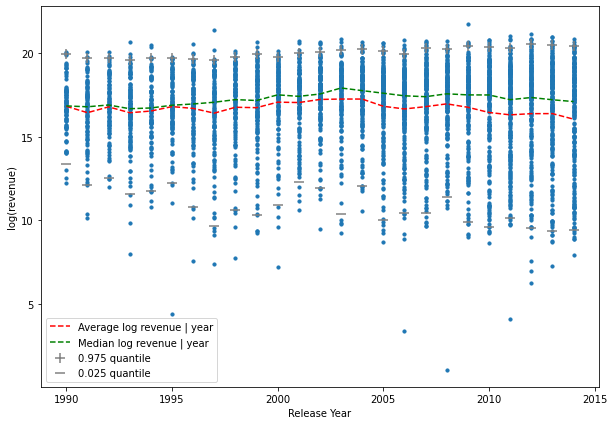

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(train['release_year'],train['log_revenue_final'],s=10)
plt.xlabel('Release Year')
plt.ylabel('log(revenue)')
plt.plot(train.groupby('release_year')['log_revenue_final'].mean().index,train.groupby('release_year')['log_revenue_final'].mean().values,'r--',label='Average log revenue | year')
plt.plot(train.groupby('release_year')['log_revenue_final'].median().index,train.groupby('release_year')['log_revenue_final'].median().values,'g--',label='Median log revenue | year')
plt.scatter(train.groupby('release_year')['log_revenue_final'].quantile(0.975).index, train.groupby('release_year')['log_revenue_final'].quantile(0.975).values,c='grey',marker='+',s=100,label='0.975 quantile')
plt.scatter(train.groupby('release_year')['log_revenue_final'].quantile(0.025).index, train.groupby('release_year')['log_revenue_final'].quantile(0.025).values,c='grey',marker='_',s=100,label='0.025 quantile')

plt.legend()
 
plt.show()
# plt.savefig(g_path+'release_year_log_revenue_trend1.png',bbox_inches='tight')

# Random Forest

# Ridge Regression

In [ ]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

default parameters

In [ ]:
clf = linear_model.Ridge()
clf.fit(train_sub[features],train_sub['log_revenue_final'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print(clf.score(train_sub[features],train_sub['log_revenue_final']))

0.5316049822606842


In [ ]:
coef_train_sub = pd.DataFrame(clf.coef_,columns=['coeff'])
coef_train_sub['features'] = features
coef_train_sub['abs_coeff'] = np.abs(clf.coef_)

In [ ]:
def validate(models, X_train,X_val,y_train,y_val, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_val = []
        mse_train=[]
        mse_val = []
        for j in range(iterations):
            r2_val.append(metrics.r2_score(y_val,
                                            models[i].fit(X_train, y_train).predict(X_val)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
            mse_train.append(metrics.mean_squared_error(y_train,models[i].fit(X_train,y_train).predict(X_train)))
            mse_val.append(metrics.mean_squared_error(y_val,models[i].fit(X_train,y_train).predict(X_val)))
        results[i] = [np.mean(r2_train), np.mean(r2_val),np.mean(mse_train),np.mean(mse_val)]
    return pd.DataFrame(results)

In [ ]:
models = {'OLS': linear_model.LinearRegression(),
         'Ridge': linear_model.Ridge(),}

In [ ]:
validate(models,rescaled_train_sub[features],rescaled_val[features],train_sub['log_revenue_final'],val['log_revenue_final'])

,OLS,Ridge
0,0.530985,0.530971
1,0.569733,0.568545
2,2.882767,2.882853
3,4.297255,4.309126


Select best alpha

In [ ]:
ridge_param = [10**(i) for i in range(-10,1)]+list(np.arange(10,100,5))+[10**i for i in range(2,8)]
selector = dict()
for param in ridge_param:
    model = linear_model.Ridge(alpha=param)
    model.fit(rescaled_train_sub_all[features],train_sub['log_revenue_final'])
    selector[param] = [metrics.mean_squared_error(val['log_revenue_final'],model.predict(rescaled_val_all[features])),model.score(rescaled_val_all[features],val['log_revenue_final'])]

In [ ]:
selector

{1e-10: [4.535417886181275, 0.5458869309836454],
 1e-09: [4.535417886182891, 0.5458869309834837],
 1e-08: [4.535417886199052, 0.5458869309818656],
 1e-07: [4.535417886360664, 0.545886930965684],
 1e-06: [4.5354178879767835, 0.5458869308038685],
 1e-05: [4.535417904137969, 0.5458869291857142],
 0.0001: [4.535418065750044, 0.5458869130041502],
 0.001: [4.5354196818933366, 0.5458867511862517],
 0.01: [4.535435845579441, 0.5458851327816664],
 0.1: [4.535597707371749, 0.5458689262143541],
 1: [4.537238436875639, 0.5457046465979802],
 10: [4.5555141653526094, 0.543874771742904],
 15: [4.566793137793985, 0.5427454538014835],
 20: [4.578624661246913, 0.5415608111596845],
 25: [4.590855786285833, 0.5403361580255444],
 30: [4.603362894741095, 0.53908387178695],
 35: [4.616045989154966, 0.537813964785336],
 40: [4.628824172161644, 0.5365345369470997],
 45: [4.6416320482651825, 0.5352521360590404],
 50: [4.654416845222576, 0.5339720459926406],
 55: [4.667136100202782, 0.5326985183796147],
 60: [4.

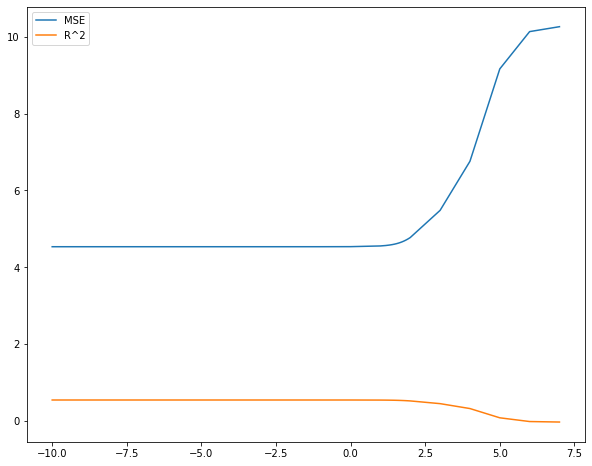

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(list(selector.keys())),np.array(list(selector.values()))[:,0],label='MSE')
plt.plot(np.log10(list(selector.keys())),np.array(list(selector.values()))[:,1],label='R^2')
plt.legend()
plt.show()

Run best model

In [ ]:
best = linear_model.Ridge(alpha=0.01)
best.fit(rescaled_train_sub_all[features],train_sub['log_revenue_final'])

# print(metrics.mean_squared_error(test['log_revenue_final'],best.predict(rescaled_test_all[features])), best.score(rescaled_test_all[features],test['log_revenue_final']))

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
best_coef = pd.DataFrame(best.coef_,columns=['coef'])
best_coef['features'] = rescaled_train_sub_all[features].columns
best_coef['abs_coef'] = np.abs(best_coef['coef'])
best_coef.sort_values('abs_coef',ascending=False)

,coef,features,abs_coef
11,1.028834,major,1.028834
47,0.907899,medium,0.907899
0,0.593595,log_budget_final,0.593595
14,0.544429,minor,0.544429
9,0.422578,runtime,0.422578
38,0.392832,first_in_collection,0.392832
6,0.289086,actor_logrev_of_past_5_years_0,0.289086
21,0.258344,sequel,0.258344
20,0.192554,actor_logrev_of_past_5_years_3,0.192554
2,0.187670,director_logrev_of_past_10_years_0,0.187670


Plot fit 

In [1]:
y_pred = best.predict(rescaled_train_sub_all[features])
plt.figure(figsize=(10,7))
plt.scatter(train_sub['log_budget_final'],train_sub['log_revenue_final'],s=10,label='True')
plt.scatter(train_sub['log_budget_final'][np.argsort(train_sub['log_budget_final'])],y_pred[np.argsort(train_sub['log_budget_final'])],c='red',s=10,label='Prediction')
plt.legend()
plt.xlabel('log(budget)')
plt.ylabel('log(revenue)')
plt.savefig(g_path+'ridge_best_fit_on_budget.png',bbox_inches='tight')

NameError: ignored

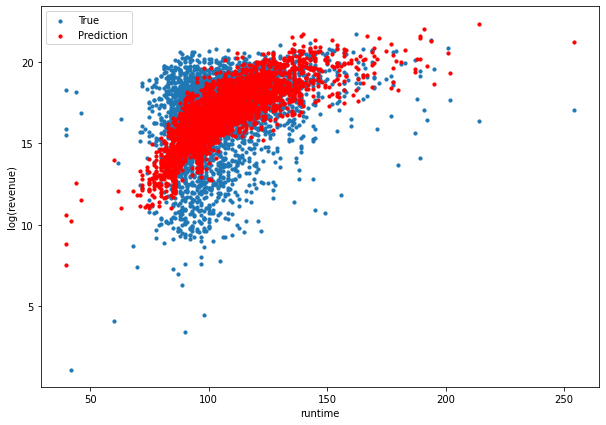

In [ ]:
bey_pred = best.predict(rescaled_train_sub_all[features])
plt.figure(figsize=(10,7))
plt.scatter(train_sub['runtime'],train_sub['log_revenue_final'],s=10,label='True')
plt.scatter(train_sub['runtime'][np.argsort(train_sub['runtime'])],y_pred[np.argsort(train_sub['log_budget_final'])],c='red',s=10,label='Prediction')
plt.legend()
plt.xlabel('runtime')
plt.ylabel('log(revenue)')
plt.savefig(g_path+'ridge_best_fit_on_runtime.png',bbox_inches='tight')

In [ ]:
print(metrics.mean_squared_error(val['log_revenue_final'],best.predict(rescaled_val_all[features])), best.score(rescaled_val_all[features],val['log_revenue_final']))

4.535435845579441 0.5458851327816664


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid

In [ ]:
list(np.arange(800,2200,200))+[None]

[800, 1000, 1200, 1400, 1600, 1800, 2000, None]

In [ ]:
grid = ParameterGrid({'n_estimators':[10**i for i in range(2,5)],
                    #   'min_samples_split':[2**i for i in range(1,6)],
                    #   'max_features':['auto', 'sqrt'],
                      'max_depth': list(np.arange(500,2000,500))+[None],
                      'min_samples_leaf':[2**i for i in range(1,5)],
                    #   'bootstrap':[True,False]
                      })

In [ ]:
len(list(grid))

32

In [ ]:
selector_rf = []
for param in tqdm(grid):
    rf = RandomForestRegressor(n_estimators=param['n_estimators'],
                            #    min_samples_split=param['min_samples_split'],
                            #  max_features=param['max_features'],
                               max_depth = param['max_depth'],
                               min_samples_leaf = param['min_samples_leaf']
                                # ccp_alpha=
                            #    ,bootstrap=param['bootstrap']
                               )
    rf.fit(train_sub[features],train_sub['log_revenue_final'])
    print([param,metrics.mean_squared_error(val['log_revenue_final'],rf.predict(val[features]))])
    selector_rf.append([param,metrics.mean_squared_error(val['log_revenue_final'],rf.predict(val[features]))])

  3%|▎         | 1/32 [00:49<25:49, 49.99s/it]

[{'max_depth': 500, 'min_samples_leaf': 2, 'n_estimators': 1000}, 4.175214660428119]
[{'max_depth': 500, 'min_samples_leaf': 2, 'n_estimators': 10000}, 4.147145957501436]


  9%|▉         | 3/32 [09:59<1:09:29, 143.78s/it]

[{'max_depth': 500, 'min_samples_leaf': 4, 'n_estimators': 1000}, 4.1225836236564]
[{'max_depth': 500, 'min_samples_leaf': 4, 'n_estimators': 10000}, 4.082061121456072]


 16%|█▌        | 5/32 [17:43<1:17:03, 171.24s/it]

[{'max_depth': 500, 'min_samples_leaf': 8, 'n_estimators': 1000}, 4.083528246606548]
[{'max_depth': 500, 'min_samples_leaf': 8, 'n_estimators': 10000}, 4.117602536368107]


 22%|██▏       | 7/32 [24:16<1:10:31, 169.25s/it]

[{'max_depth': 500, 'min_samples_leaf': 16, 'n_estimators': 1000}, 4.752208366504377]
[{'max_depth': 500, 'min_samples_leaf': 16, 'n_estimators': 10000}, 4.698318405015097]


 28%|██▊       | 9/32 [30:15<1:02:28, 162.96s/it]

[{'max_depth': 1000, 'min_samples_leaf': 2, 'n_estimators': 1000}, 4.114662463532366]
[{'max_depth': 1000, 'min_samples_leaf': 2, 'n_estimators': 10000}, 4.138989991733545]


 34%|███▍      | 11/32 [39:23<1:09:33, 198.73s/it]

[{'max_depth': 1000, 'min_samples_leaf': 4, 'n_estimators': 1000}, 4.1087925179567115]
[{'max_depth': 1000, 'min_samples_leaf': 4, 'n_estimators': 10000}, 4.094235369424717]


 41%|████      | 13/32 [47:05<1:02:37, 197.76s/it]

[{'max_depth': 1000, 'min_samples_leaf': 8, 'n_estimators': 1000}, 4.13475468394127]
[{'max_depth': 1000, 'min_samples_leaf': 8, 'n_estimators': 10000}, 4.123706850633065]


 47%|████▋     | 15/32 [53:39<51:38, 182.29s/it]  

[{'max_depth': 1000, 'min_samples_leaf': 16, 'n_estimators': 1000}, 4.655746074060387]
[{'max_depth': 1000, 'min_samples_leaf': 16, 'n_estimators': 10000}, 4.697548916070502]


 53%|█████▎    | 17/32 [59:34<42:05, 168.34s/it]

[{'max_depth': 1500, 'min_samples_leaf': 2, 'n_estimators': 1000}, 4.132025679734407]
[{'max_depth': 1500, 'min_samples_leaf': 2, 'n_estimators': 10000}, 4.123804565521453]


 59%|█████▉    | 19/32 [1:08:41<43:38, 201.40s/it]  

[{'max_depth': 1500, 'min_samples_leaf': 4, 'n_estimators': 1000}, 4.110155848686203]
[{'max_depth': 1500, 'min_samples_leaf': 4, 'n_estimators': 10000}, 4.1091912807277025]


 66%|██████▌   | 21/32 [1:16:21<36:24, 198.58s/it]

[{'max_depth': 1500, 'min_samples_leaf': 8, 'n_estimators': 1000}, 4.125365462592371]
[{'max_depth': 1500, 'min_samples_leaf': 8, 'n_estimators': 10000}, 4.124030809570224]


 72%|███████▏  | 23/32 [1:22:59<27:31, 183.54s/it]

[{'max_depth': 1500, 'min_samples_leaf': 16, 'n_estimators': 1000}, 4.692247814245167]
[{'max_depth': 1500, 'min_samples_leaf': 16, 'n_estimators': 10000}, 4.707074902665078]


 78%|███████▊  | 25/32 [1:28:57<19:47, 169.70s/it]

[{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 1000}, 4.167895642453141]
[{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 10000}, 4.15371303693301]


 84%|████████▍ | 27/32 [1:38:05<16:50, 202.03s/it]

[{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 1000}, 4.050407028298536]
[{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 10000}, 4.098961941345345]


 91%|█████████ | 29/32 [1:45:45<09:56, 198.85s/it]

[{'max_depth': None, 'min_samples_leaf': 8, 'n_estimators': 1000}, 4.132647612128627]
[{'max_depth': None, 'min_samples_leaf': 8, 'n_estimators': 10000}, 4.132824829384284]


 97%|█████████▋| 31/32 [1:52:17<03:02, 182.57s/it]

[{'max_depth': None, 'min_samples_leaf': 16, 'n_estimators': 1000}, 4.692565984012558]
[{'max_depth': None, 'min_samples_leaf': 16, 'n_estimators': 10000}, 4.6961956282515045]


100%|██████████| 32/32 [1:57:22<00:00, 220.08s/it]


In [ ]:
selector_rf = []
for param in tqdm(grid):
    rf = RandomForestRegressor(n_estimators=param['n_estimators'],
                            #    min_samples_split=param['min_samples_split'],
                            #  max_features=param['max_features'],
                            #    max_depth = param['max_depth'],
                               min_samples_leaf = param['min_samples_leaf']
                                # ccp_alpha=
                            #    ,bootstrap=param['bootstrap']
                               )
    rf.fit(train_sub[features],train_sub['log_revenue_final'])
    print([param,metrics.mean_squared_error(val['log_revenue_final'],rf.predict(val[features]))])
    selector_rf.append([param,metrics.mean_squared_error(val['log_revenue_final'],rf.predict(val[features]))])

In [ ]:
# # using all features
# selector_rf_new = []
# for param in grid:
#     rf = RandomForestRegressor(n_estimators=param['n_estimators'],
#                             #    min_samples_split=param['min_samples_split'],
#                             #  max_features=param['max_features'],
#                                max_depth = param['max_depth'],
#                                min_samples_leaf = param['min_samples_leaf']
#                             #    ,bootstrap=param['bootstrap']
#                                )
#     rf.fit(train_sub[all_features],train_sub['log_revenue_final'])
    
#     selector_rf_new.append([param,metrics.mean_squared_error(val['log_revenue_final'],rf.predict(val[all_features]))])


In [ ]:
def selectorDF(selector):
    selector_rf_df = pd.DataFrame([selector[i][0].values() for i in range(len(selector))],columns=selector[0][0].keys())
    selector_rf_df['MSE'] = [selector[i][1] for i in range(len(selector))]
    return selector_rf_df

In [ ]:
selector_rf_df = selectorDF(selector_rf)

In [ ]:
selector_rf_df.sort_values('MSE')

,max_depth,min_samples_leaf,n_estimators,MSE
26,NaN,4,1000,4.050407
3,500.0,4,10000,4.082061
4,500.0,8,1000,4.083528
11,1000.0,4,10000,4.094235
27,NaN,4,10000,4.098962
10,1000.0,4,1000,4.108793
19,1500.0,4,10000,4.109191
18,1500.0,4,1000,4.110156
8,1000.0,2,1000,4.114662
5,500.0,8,10000,4.117603


In [ ]:
best_rf = RandomForestRegressor(n_estimators=1000,
                               min_samples_leaf = 4)

In [ ]:
best_rf.fit(train_sub[features],train_sub['log_revenue_final'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
metrics.mean_squared_error(val['log_revenue_final'],best_rf.predict(val[features]))

4.086555732958425

In [ ]:
metrics.r2_score(val['log_revenue_final'],best_rf.predict(val[features]))

0.5908296848997441

# VIF and OLS


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics

In [ ]:
def calculateVIF(features):
    X = sm.add_constant(train_sub[features])
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.to_numpy(), i) for i in range(len(X.columns))] 
    vif = vif.sort_values('VIF',ascending=False)
    print(vif.loc[vif['VIF']>5])
    return vif

In [ ]:
vif1 = calculateVIF(features)

                            feature         VIF
0                             const  676.671533
27                            major    8.603999
28                            minor    8.529934
29                           medium    8.100123
9    actor_logrev_of_past_5_years_0    7.583382
14  actor_logrev_of_past_10_years_0    6.582281
10   actor_logrev_of_past_5_years_1    6.415716
11   actor_logrev_of_past_5_years_2    5.606879
12   actor_logrev_of_past_5_years_3    5.433655
15  actor_logrev_of_past_10_years_1    5.321512
24                    popular_genre    5.270250
13   actor_logrev_of_past_5_years_4    5.044906


In [ ]:
new_features = mutual_info_ranking[:48]

In [ ]:
vif2 = calculateVIF(new_features)

In [ ]:
def removeFeatures(new_features,year):
    final_ols_features = [f for f in new_features]
    if year == 5:
        ## 5 years
        for f in ['popular_genre','actor_logrev_of_past_10_years_0','actor_logrev_of_past_10_years_1','actor_logrev_of_past_10_years_2','actor_logrev_of_past_10_years_3','actor_logrev_of_past_10_years_4','actor_logrev_of_past_2_years_0','actor_logrev_of_past_2_years_1','actor_logrev_of_past_2_years_2','actor_logrev_of_past_2_years_3','actor_logrev_of_past_2_years_4','director_logrev_of_past_10_years_0','director_logrev_of_past_2_years_0']:
            final_ols_features.remove(f)
    else if year == 2:
        ## 2 years
        for f in ['popular_genre','actor_logrev_of_past_5_years_0','actor_logrev_of_past_5_years_1','actor_logrev_of_past_5_years_2','actor_logrev_of_past_5_years_3','actor_logrev_of_past_5_years_4','actor_logrev_of_past_2_years_0','actor_logrev_of_past_2_years_1','actor_logrev_of_past_2_years_2','actor_logrev_of_past_2_years_3','actor_logrev_of_past_2_years_4','director_logrev_of_past_10_years_0','director_logrev_of_past_5_years_0']:
            final_ols_features.remove(f)
    else if year == 10:
        ## 10 years
        for f in ['popular_genre','actor_logrev_of_past_5_years_0','actor_logrev_of_past_5_years_1','actor_logrev_of_past_5_years_2','actor_logrev_of_past_5_years_3','actor_logrev_of_past_5_years_4','actor_logrev_of_past_2_years_0','actor_logrev_of_past_2_years_1','actor_logrev_of_past_2_years_2','actor_logrev_of_past_2_years_3','actor_logrev_of_past_2_years_4','director_logrev_of_past_2_years_0','director_logrev_of_past_5_years_0']:
            final_ols_features.remove(f)
    return final_ols_features

In [ ]:
final_ols_features = removeFeatures(new_features,5)
# final_ols_features = removeFeatures(new_features,2)
# final_ols_features = removeFeatures(new_features,10)
vif3 = calculateVIF(final_ols_features)

   feature         VIF
0    const  442.581033
7    major    8.506541
8    minor    8.434403
35  medium    7.995233


In [ ]:
lr = LinearRegression()
## on validation
# lr.fit(rescaled_train_sub[final_ols_features],train_sub['log_revenue_final'])
## on test
lr.fit(rescaled_train[final_ols_features],train['log_revenue_final'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## on validation
# r_2_val = lr.score(rescaled_val[final_ols_features],val['log_revenue_final'])
# mse_val = metrics.mean_squared_error(val['log_revenue_final'],lr.predict(rescaled_val[final_ols_features]))
# print(f'R^2 on val: {r_2_val}, MSE: {mse_val}')
## on test
r_2_val = lr.score(rescaled_test[final_ols_features],test['log_revenue_final'])
mse_val = metrics.mean_squared_error(test['log_revenue_final'],lr.predict(rescaled_test[final_ols_features]))
print(f'R^2 on test: {r_2_val}, MSE: {mse_val}')

R^2 on test: 0.48782745621629564, MSE: 3.9503399562826003


In [ ]:
# model = sm.OLS(train_sub['log_revenue_final'],sm.add_constant(rescaled_train_sub[final_ols_features]))
model = sm.OLS(train['log_revenue_final'],sm.add_constant(rescaled_train[final_ols_features]))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_revenue_final   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:07:14   Log-Likelihood:                -7617.2
No. Observations:                3832   AIC:                         1.531e+04
Df Residuals:                    3796   BIC:                         1.553e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    14.7151      0.189     77.909      0.000      14.345      15.085
log_budget_final                          0.5811      0.041     14.203      0.000       0.501       0.661
director_logrev_of_past_5_years_0         0.2437      0.031      7.769      0.000       0.182       0.305
actor_logrev_of_past_5_years_0            0.2473      0.035      7.167      0.000       0.180       0.315
actor_logrev_of_past_5_years_1            0.1042      0.034      3.103      0.002       0.038       0.170
runtime                                   0.4380      0.036     12.225      0.000       0.368       0.508
Adventure                                 0.1527      0.095      1.614      0.107      -0.033       0.338
major                                     2.2236      0.189     11.784      0.000       1.854       2.594
minor                                     0.9839      0.178      5.527      0.000       0.635       1.333
actor_logrev_of_past_5_years_4            0.0857      0.031      2.780      0.005       0.025       0.146
actor_is_top_100_of_past_10_years_0       0.1853      0.089      2.079      0.038       0.011       0.360
actor_is_top_100_of_past_5_years_0       -0.0050      0.095     -0.052      0.958      -0.192       0.182
actor_logrev_of_past_5_years_3            0.0838      0.031      2.671      0.008       0.022       0.145
sequel                                    0.8195      0.102      8.038      0.000       0.620       1.019
Family                                    0.4680      0.118      3.950      0.000       0.236       0.700
actor_is_top_100_of_past_10_years_1       0.0261      0.107      0.244      0.807      -0.183       0.235
Documentary                              -0.5152      0.183     -2.822      0.005      -0.873      -0.157
Animation                                 0.6521      0.161      4.038      0.000       0.335       0.969
Fantasy                                   0.1945      0.108      1.807      0.071      -0.017       0.405
actor_logrev_of_past_5_years_2            0.0127      0.032      0.390      0.696      -0.051       0.076
Drama                                    -0.4057      0.069     -5.903      0.000      -0.540      -0.271
actor_is_top_100_of_past_5_years_1       -0.0151      0.112     -0.135      0.892      -0.235       0.204
director_is_top_50_of_past_5_years_0      0.1485      0.128      1.163      0.245      -0.102       0.399
gender_score                              0.0476      0.031      1.522      0.128      -0.014       0.109
actor_is_top_100_of_past_2_years_0        0.1373      0.085      1.615      0.106      -0.029       0.304
has_oscar_winner                          0.1975      0.075      2.625      0.009       0.050       0.345
director_

In [ ]:
## save fig
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
# plt.savefig(g_path+'ols_on_final_features_5_years_test.png',bbox_inches='tight')

run Ridge regression on final features

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(rescaled_train_sub[final_ols_features],train_sub['log_revenue_final'])

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print(metrics.mean_squared_error(val['log_revenue_final'],ridge.predict(rescaled_val[final_ols_features])), ridge.score(rescaled_val[final_ols_features],val['log_revenue_final']))

4.344580216245477 0.5649947358548395
